## Import libraries

In [1]:
# Import Libraries 
library(tidyverse)
library(janitor)
library(stringr)
library(lubridate)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




## Import data and create dataframes

In [2]:
# Load csv files.  Readin all columns as characters, eliminates issues with formatting (some cr_id were defaulting to NA)
accused_df <- read_csv("../data/raw/accused.csv", col_type = paste(rep("c",10),collapse = ""))
complaints_df <- read_csv("../data/raw/complaints.csv", col_type = paste(rep("c",11),collapse = ""))
salary_df <- read_csv("../data/raw/salary.csv", col_types = paste(rep("c",8),collapse = ""))
demographics_df <- read_csv("../data/raw/demographics.csv", col_types = paste(rep("c",20), collapse = ""))

complaints_all_staff <- read_csv("../data/processed/complaints_all_staff.csv")
complaints_police <- read_csv("../data/processed/complaints_police.csv")


-- Column specification --------------------------------------------------------
cols(
  salary = col_double(),
  year = col_double(),
  cleaned_rank = col_character(),
  link_UID = col_double(),
  complaints_per_year = col_double(),
  race = col_character(),
  gender = col_character(),
  birth_year = col_double(),
  org_hire_date = col_date(format = ""),
  start_date = col_date(format = ""),
  resignation_date = col_date(format = ""),
  approx_age = col_double(),
  approx_years_service = col_double()
)



-- Column specification --------------------------------------------------------
cols(
  salary = col_double(),
  year = col_double(),
  cleaned_rank = col_character(),
  link_UID = col_double(),
  complaints_per_year = col_double(),
  race = col_character(),
  gender = col_character(),
  birth_year = col_double(),
  org_hire_date = col_date(format = ""),
  start_date = col_date(format = ""),
  resignation_date = col_date(format = ""),
  approx_age = col_double(),
  approx_years_ser

In [3]:
# See first few rows of DFs
head(accused_df)
head(complaints_df)
head(salary_df)
head(demographics_df)

head(complaints_all_staff)
head(complaints_police)

UID,complaint_category,complaint_code,cr_id,cv,final_finding,final_outcome,recc_finding,recc_outcome,link_UID
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
130469.0,SUPERVISOR RESPONSIBILITY: FAIL TO OBTAIN COMPLAINT REGISTER NO.,12D,C170981,1,NS,NO ACTION TAKEN,NA,NA,20040.0
103495.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NA,NA,7727.0
111845.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NA,NA,17149.0
126148.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NA,NA,271.0
127906.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NA,NA,11004.0
117100.0,EXCESSIVE FORCE: NO ARREST,05D,C171131,1,EX,NO ACTION TAKEN,NA,NA,25023.0


cr_id,cv,incident_date,complaint_date,closed_date,add1,add2,beat,city,full_address,location
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1000194,2,2006-10-02,2006-10-02,NA,7809,S SOUTH SHORE DR,421.0,CHICAGO IL,NA,17
1000214,3,2006-10-03,2006-10-04,2010-12-23,7100,South WESTERN AVE,832.0,CHICAGO ILLINOIS 60636,NA,NA
1002796,3,2006-12-15,2007-01-18,2008-12-15,325,North JEFFERSON ST,1212.0,CHICAGO ILLINOIS 60661,NA,TAVERN/LIQUOR STORE
1003786,3,2007-03-01,2007-03-02,2011-02-23,NA,West 87TH ST,834.0,CHICAGO ILLINOIS 60652,NA,RESIDENCE
1005070,2,2007-04-20,2007-04-20,NA,4010,W ERIE ST,0.0,CHICAGO IL,NA,17
1005436,2,2005-05-15,2007-05-04,NA,4427,S KARLOV AVE,815.0,CHICAGO IL 60632,NA,17


UID,pay_grade,rank,salary,year,spp_date,cleaned_rank,link_UID
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
100011.0,E|3,SERGEANT,101442.0,2016.0,2016-02-01,SERGEANT,3978.0
100013.0,E|3,SERGEANT,111474.0,2016.0,2016-06-01,SERGEANT,4443.0
100014.0,D|2A,POLICE OFFICER (ASSIGNED AS DETECTIVE),76446.0,2007.0,2007-04-01,DETECTIVE,4879.0
100027.0,E|3,SERGEANT,98184.0,2016.0,2016-06-01,SERGEANT,16115.0
100044.0,D|2,POLICE OFFICER (ASSIGNED AS EVIDENCE TECHNICIAN),61518.0,2004.0,2004-12-01,POLICE OFFICER,38.0
100054.0,D|2,POLICE OFFICER/EXPLSV DETECT K9 HNDLR,87048.0,2011.0,2011-06-16,POLICE OFFICER,9432.0


UID,first_name,last_name,middle_initial,middle_initial2,suffix_name,birth_year,race,gender,appointed_date,resignation_date,current_status,current_star,current_unit,current_rank,start_date,org_hire_date,profile_count,cleaned_rank,link_UID
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
100001,A,BRODERSON,F,NA,NA,1926.0,WHITE,MALE,1950-06-03,1980-03-10,0.0,NA,NA,NA,NA,NA,3,NA,2863.0
100002,A,DALESSANDRO,A,NA,NA,1923.0,WHITE,MALE,1956-09-01,1979-10-18,0.0,NA,NA,NA,NA,NA,3,NA,6100.0
100003,A,KIBURAS,J,NA,NA,1948.0,WHITE,MALE,1968-06-24,1980-10-01,0.0,NA,NA,NA,NA,NA,3,NA,14560.0
100004,A,KUSTRA,J,NA,NA,1923.0,WHITE,MALE,1953-09-28,1980-10-01,0.0,NA,NA,NA,NA,NA,3,NA,15445.0
100005,A,MC LAUGHLIN,R,NA,NA,1941.0,BLACK,MALE,1966-06-20,1986-09-16,0.0,NA,123.0,POLICE OFFICER,NA,NA,3,POLICE OFFICER,18373.0
100006,A RICHARD,LABRIOLA,NA,NA,NA,1943.0,WHITE,MALE,1971-10-25,2004-03-15,0.0,NA,8.0,POLICE OFFICER,NA,NA,7,POLICE OFFICER,15521.0


salary,year,cleaned_rank,link_UID,complaints_per_year,race,gender,birth_year,org_hire_date,start_date,resignation_date,approx_age,approx_years_service
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<date>,<date>,<date>,<dbl>,<dbl>
76446,2007,DETECTIVE,4879,0,BLACK,MALE,1968,1996-12-02,1996-12-02,NA,39,11
87048,2011,POLICE OFFICER,9432,0,HISPANIC,MALE,1956,1987-04-13,1987-04-13,2014-05-15,55,24
99444,2014,SERGEANT,21388,0,HISPANIC,MALE,1974,2000-01-24,2000-01-24,NA,40,14
90540,2013,DETECTIVE,24345,1,HISPANIC,MALE,1967,1992-12-07,1992-12-07,NA,46,21
99756,2012,SERGEANT,11942,0,WHITE,MALE,1970,1991-12-02,1991-12-02,NA,42,21
97212,2015,SERGEANT,22253,0,HISPANIC,MALE,1983,2006-05-22,2006-05-22,NA,32,9


salary,year,cleaned_rank,link_UID,complaints_per_year,race,gender,birth_year,org_hire_date,start_date,resignation_date,approx_age,approx_years_service
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<date>,<date>,<date>,<dbl>,<dbl>
87048,2011,POLICE OFFICER,9432,0,HISPANIC,MALE,1956,1987-04-13,1987-04-13,2014-05-15,55,24
70296,2006,POLICE OFFICER,12009,0,HISPANIC,MALE,1970,1997-03-17,1997-03-17,2007-06-17,36,9
74178,2008,POLICE OFFICER,18909,0,WHITE,MALE,1967,1996-05-06,1996-05-06,NA,41,12
70296,2005,POLICE OFFICER,785,0,WHITE,MALE,1953,1992-06-29,1992-06-29,2016-08-23,52,13
72726,2006,POLICE OFFICER,11141,3,WHITE,FEMALE,1961,1992-06-29,1992-06-29,2017-05-15,45,14
72726,2006,POLICE OFFICER,20518,0,WHITE,FEMALE,1970,1992-01-02,1992-01-02,NA,36,14


## EDA

In [4]:
theme_set(theme_classic(base_size = 14))

### Explore number of complaints per year & number of officers per year

In [5]:
complaints_all_staff %>% 
    count(year)

year,n
<dbl>,<int>
2005,11651
2006,12044
2007,12119
2008,11949
2009,11699
2010,11588
2011,11109
2012,11132
2013,11160


`summarise()` ungrouping output (override with `.groups` argument)



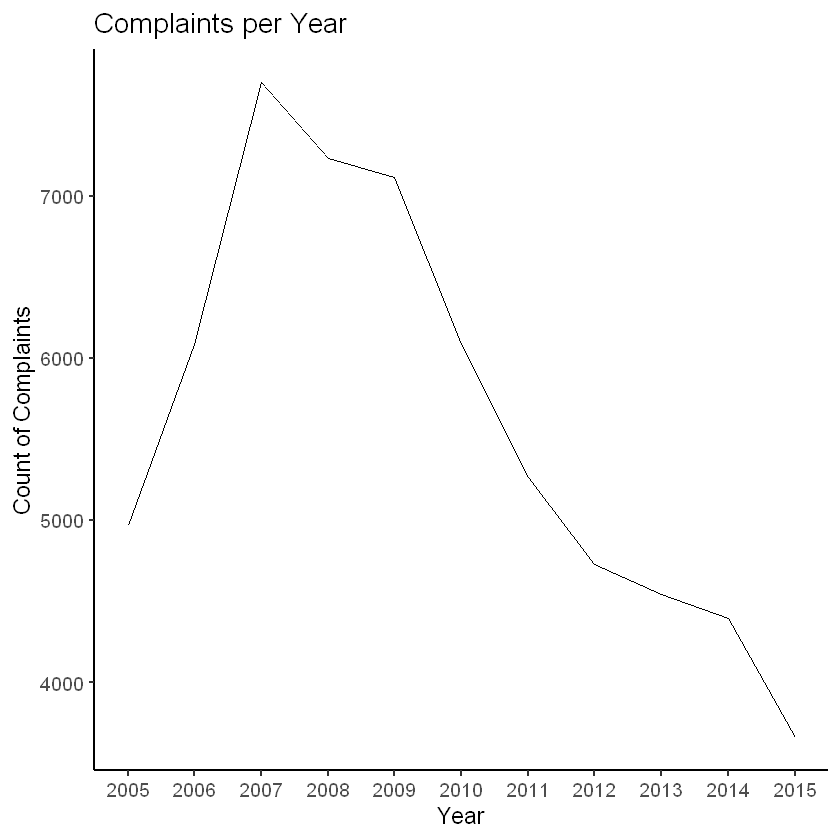

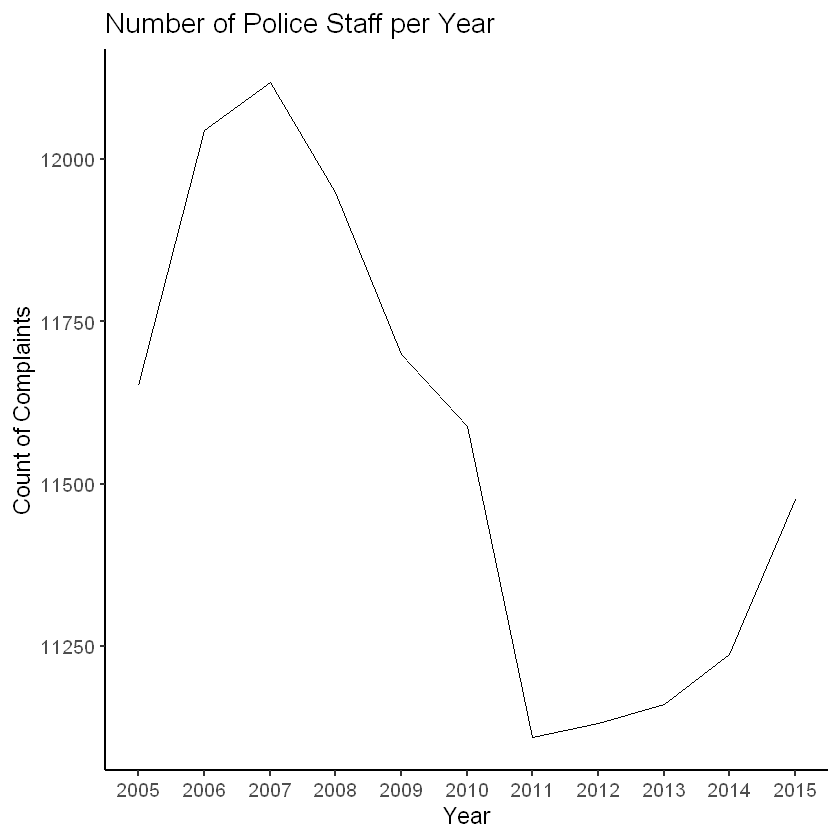

In [6]:
# Complaints by year
complaints_all_staff %>% 
    group_by(year) %>%
    summarize(n = sum(complaints_per_year)) %>%
    ggplot(aes(x = year, y = n)) + 
    geom_line() + 
    ggtitle("Complaints per Year") + 
    labs(x = "Year", y = "Count of Complaints") + 
    scale_x_continuous(breaks = 2005:2015)

# number of police staff/records per year (included in analysis)
complaints_all_staff %>% 
    count(year) %>%
    ggplot(aes(x = year, y = n)) + 
    geom_line() + 
    ggtitle("Number of Police Staff per Year") + 
    labs(x = "Year", y = "Count of Complaints") + 
    scale_x_continuous(breaks = 2005:2015)

We can see that complaints peak in 2007 and then begin to fall, until 2012 when they start to increase again. 

## Explore number of complaints per staff memeber

`summarise()` ungrouping output (override with `.groups` argument)



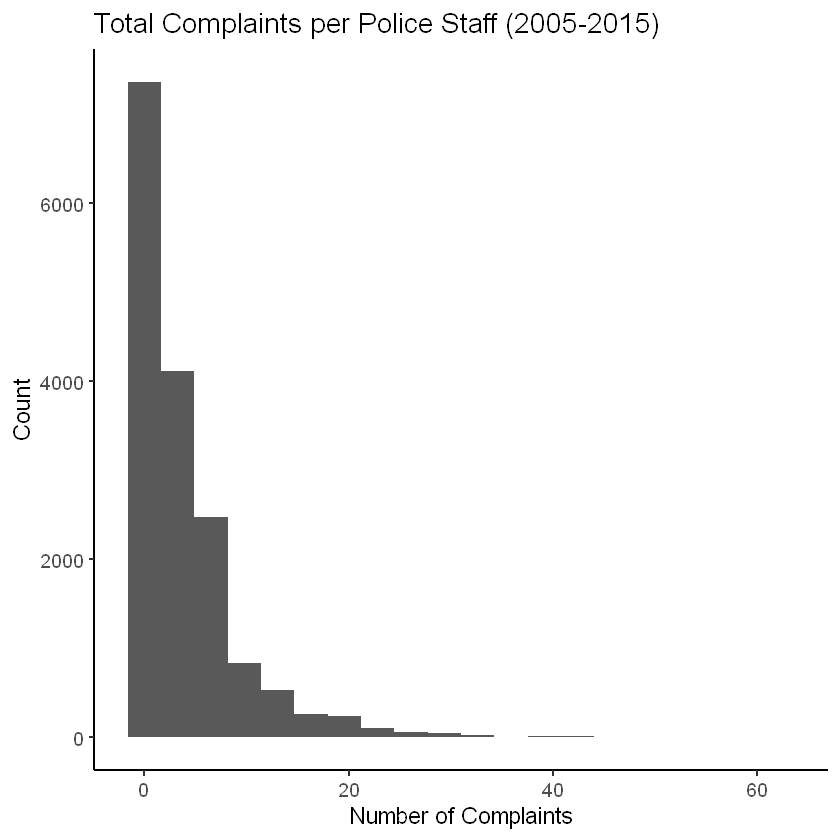

In [7]:
#Histogram of total complaints per officer - total complaints does not match because one complaint can be tied to multiple officers
complaints_all_staff %>% 
    group_by(link_UID) %>%
    summarize(n = sum(complaints_per_year)) %>%
    ggplot(aes(x = n)) +
    labs(x = "Number of Complaints", y = "Count") + 
    ggtitle("Total Complaints per Police Staff (2005-2015)") +
    geom_histogram(bins = 20)

`summarise()` regrouping output by 'link_UID' (override with `.groups` argument)



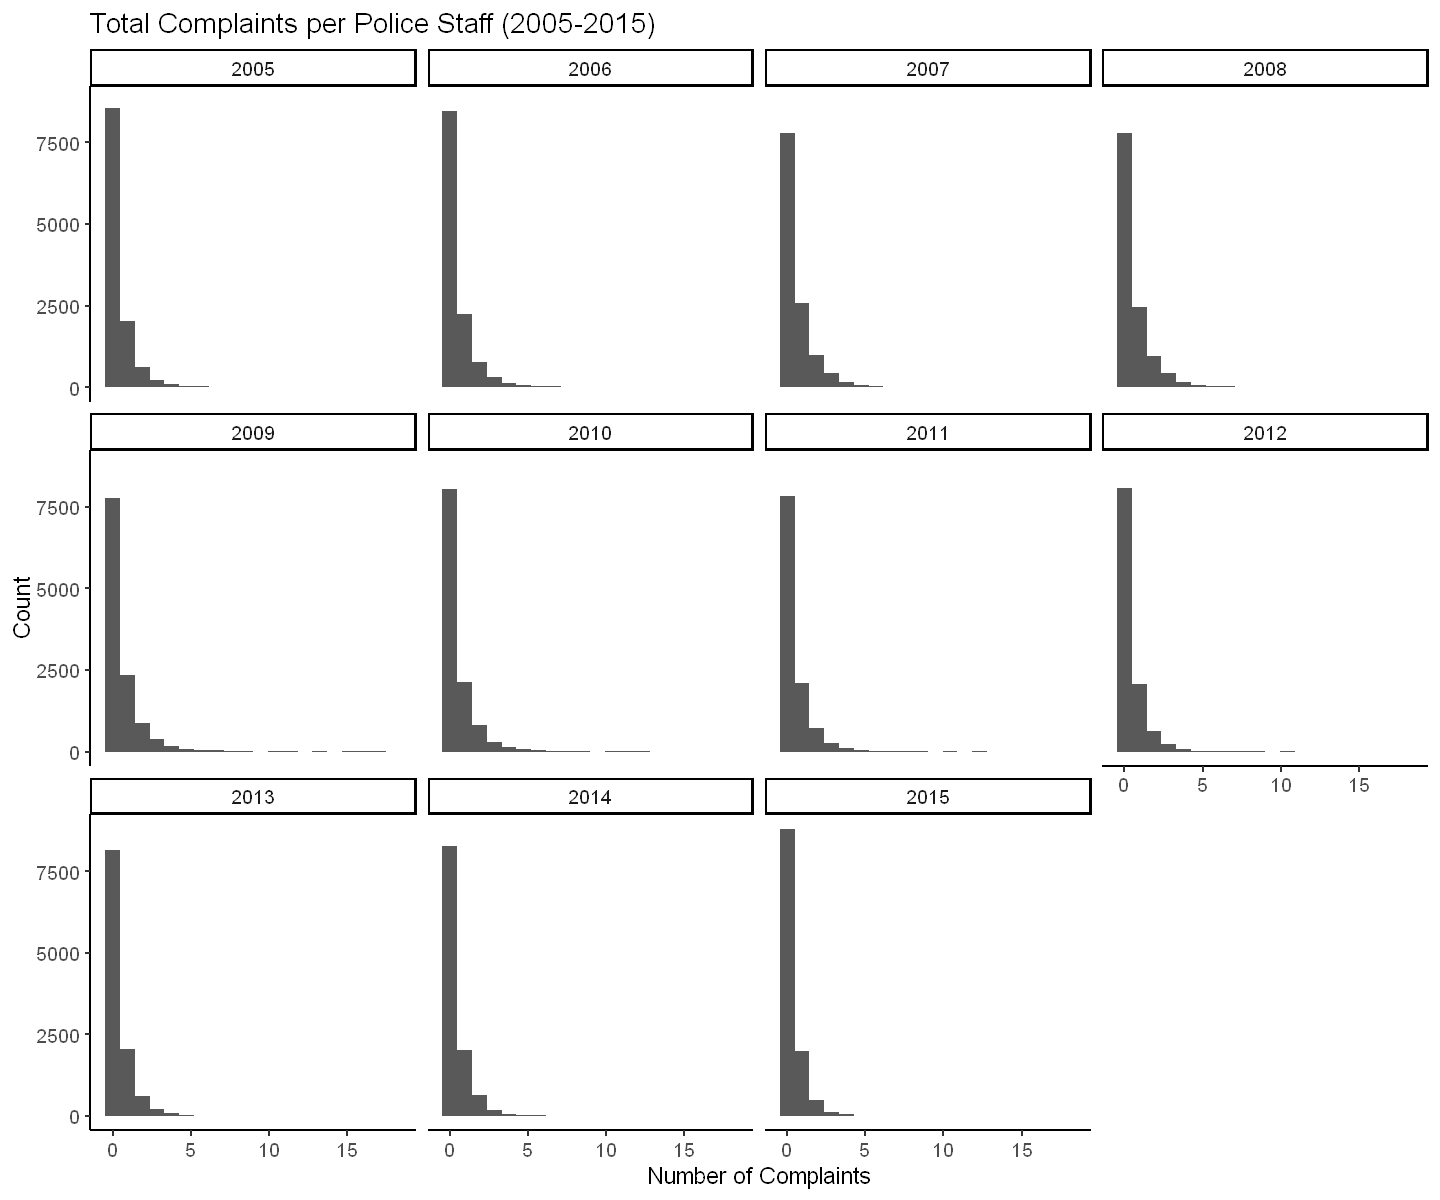

In [8]:
options(repr.plot.width=12, repr.plot.height=10)

#Faceted per year histogram
complaints_all_staff %>% 
    group_by(link_UID, year) %>%
    summarize(n = sum(complaints_per_year)) %>%
    ggplot(aes(x = n)) +
    labs(x = "Number of Complaints", y = "Count") + 
    ggtitle("Total Complaints per Police Staff (2005-2015)") +
    geom_histogram(bins = 20) +
    facet_wrap(~year, nrow=3)

We can see that the number of complaints received by individual officers does not change substantially year to year.  Most police staff memebers receive no complaints in a year.  However approx 2500 staff receive one or more complaint per year. 

## Explore Complaints by Rank / Position

`summarise()` ungrouping output (override with `.groups` argument)



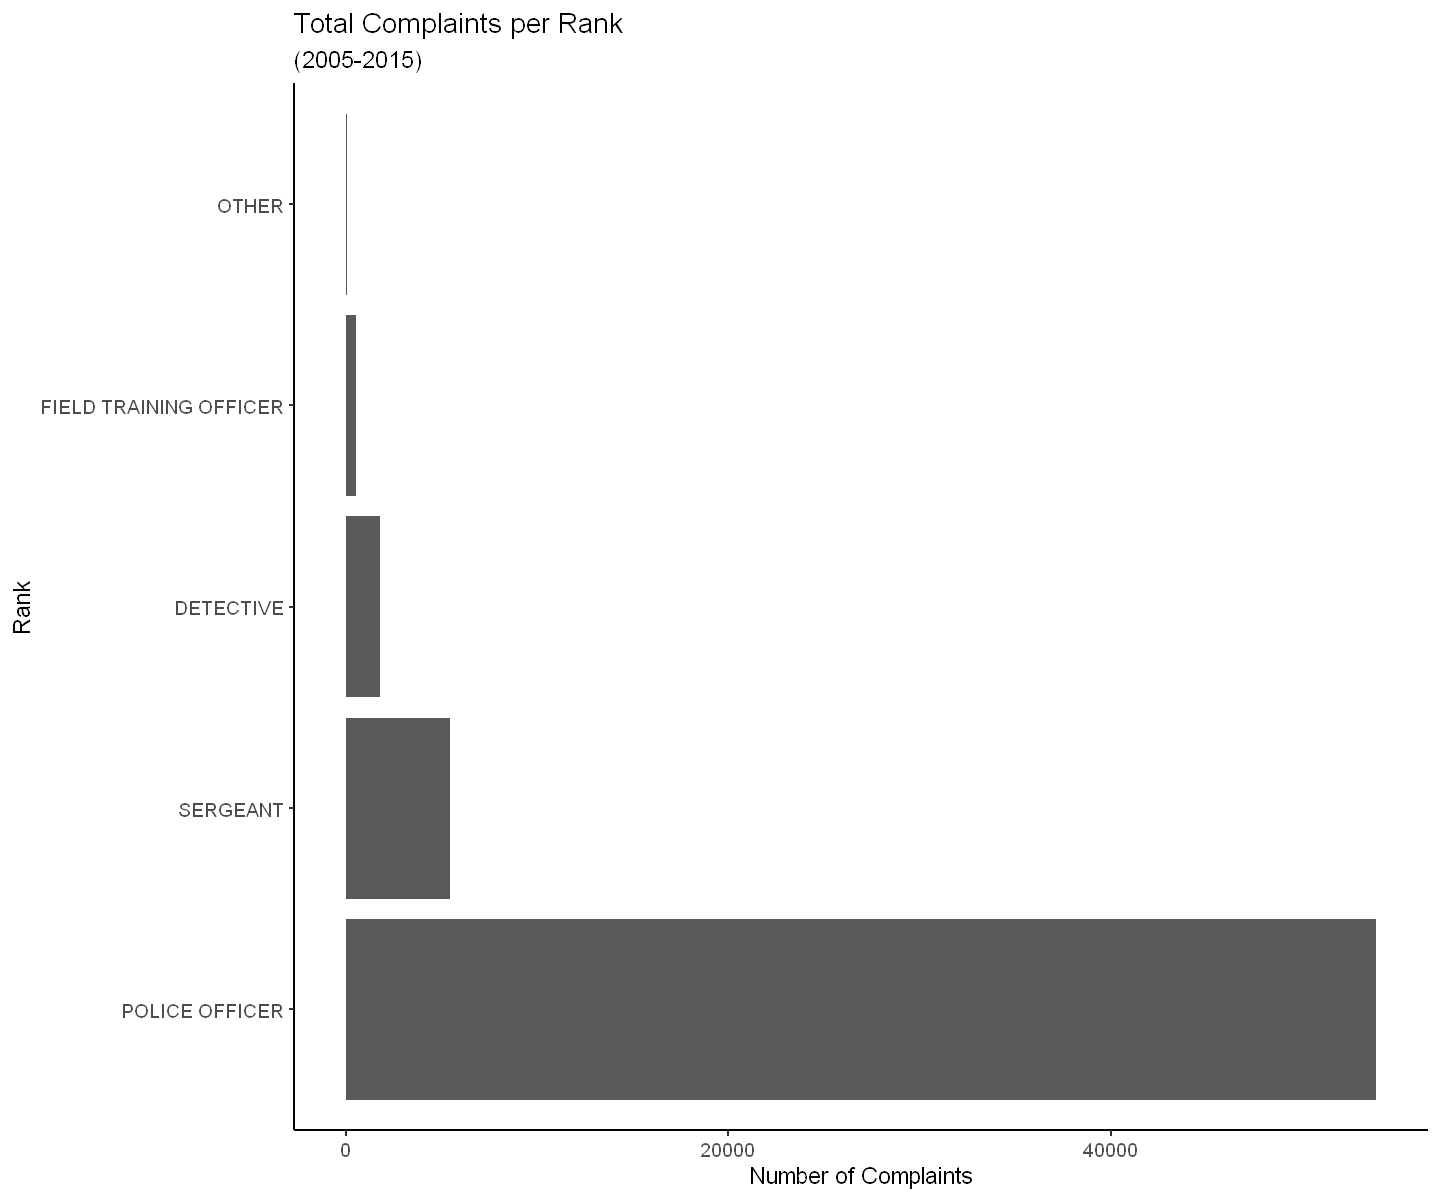

In [9]:
# complaints by officer rank
complaints_all_staff %>% 
    group_by(cleaned_rank) %>%
    summarize(n = sum(complaints_per_year)) %>%
    mutate(cleaned_rank = ifelse(n < 100, "OTHER", as.character(cleaned_rank))) %>%
    ggplot(aes(y=(reorder(cleaned_rank,-n)), x = n)) +
    labs(x = "Number of Complaints", y = "Rank", title = "Total Complaints per Rank", subtitle = "(2005-2015)") + 
    geom_col()

We can see the majority of complaints are received by Police Officers.  The remainder of the EDA will focus on that position only. 

## Explore Police Officer Salary Distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



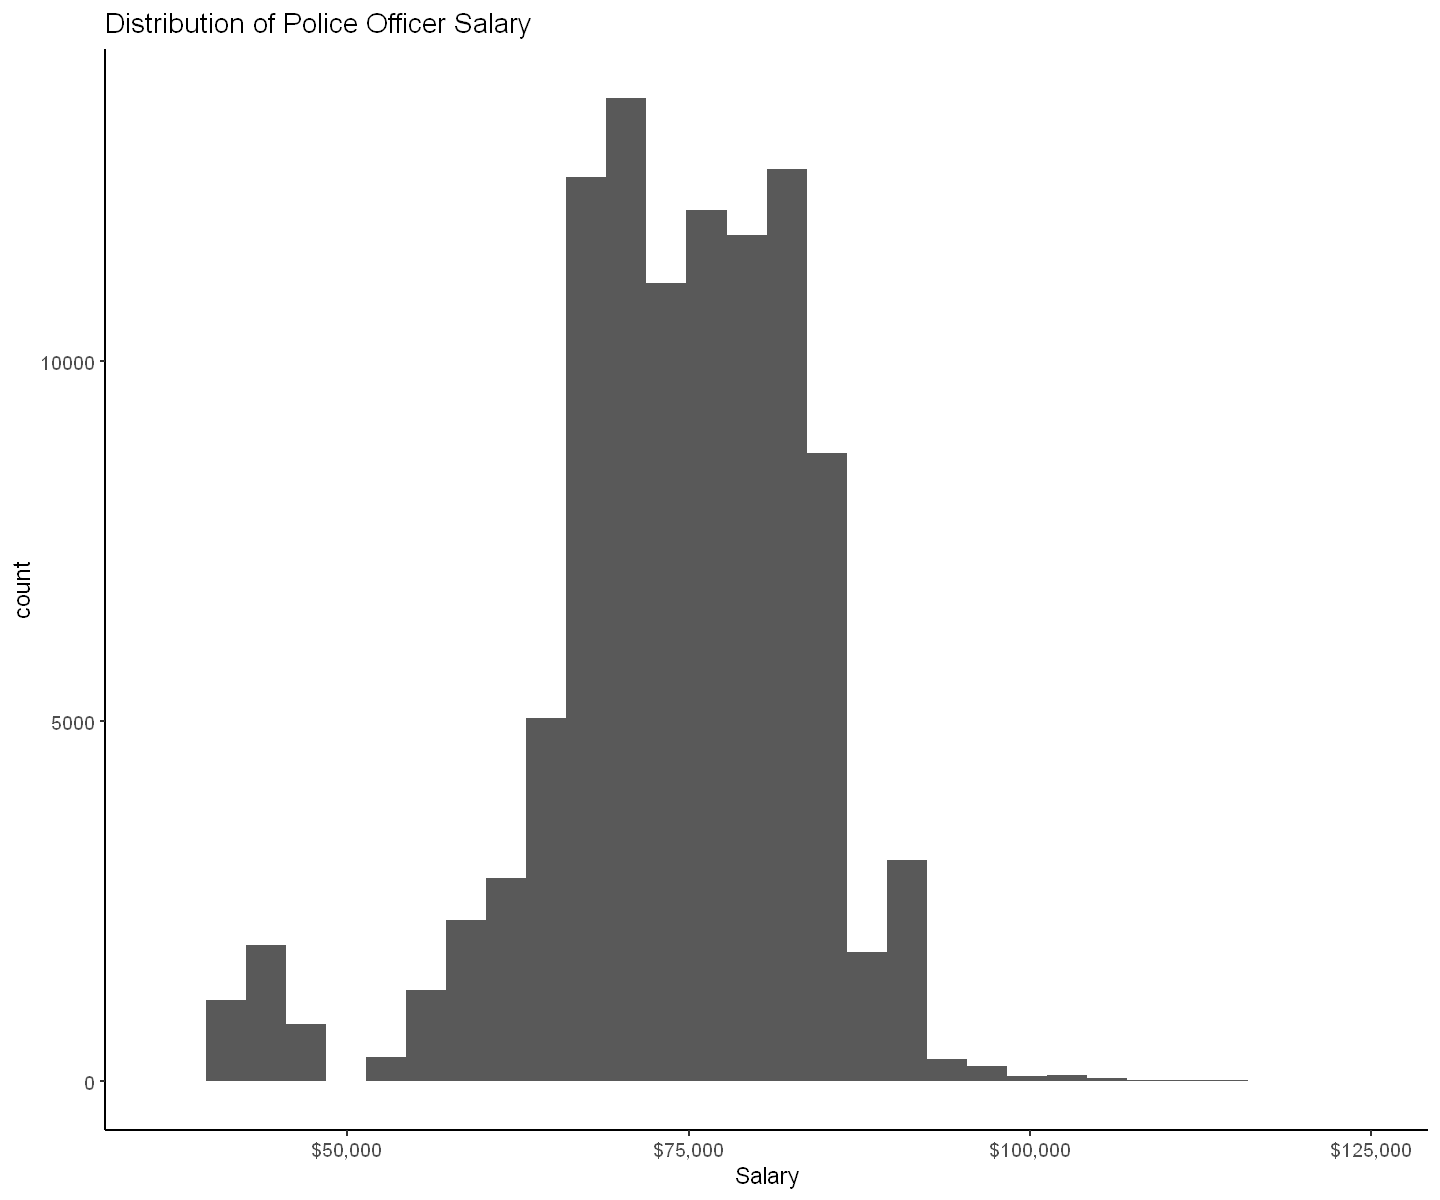

In [10]:
#Police Officer Salary Distribution
complaints_police %>% 
    ggplot(aes(x = salary)) + 
    geom_histogram() + 
    ggtitle("Distribution of Police Officer Salary") + 
    labs(x = "Salary") + 
    scale_x_continuous(labels = scales::label_dollar())

Salary appears to be approximately normally distributed. 

## Explore other demographic variable distributions

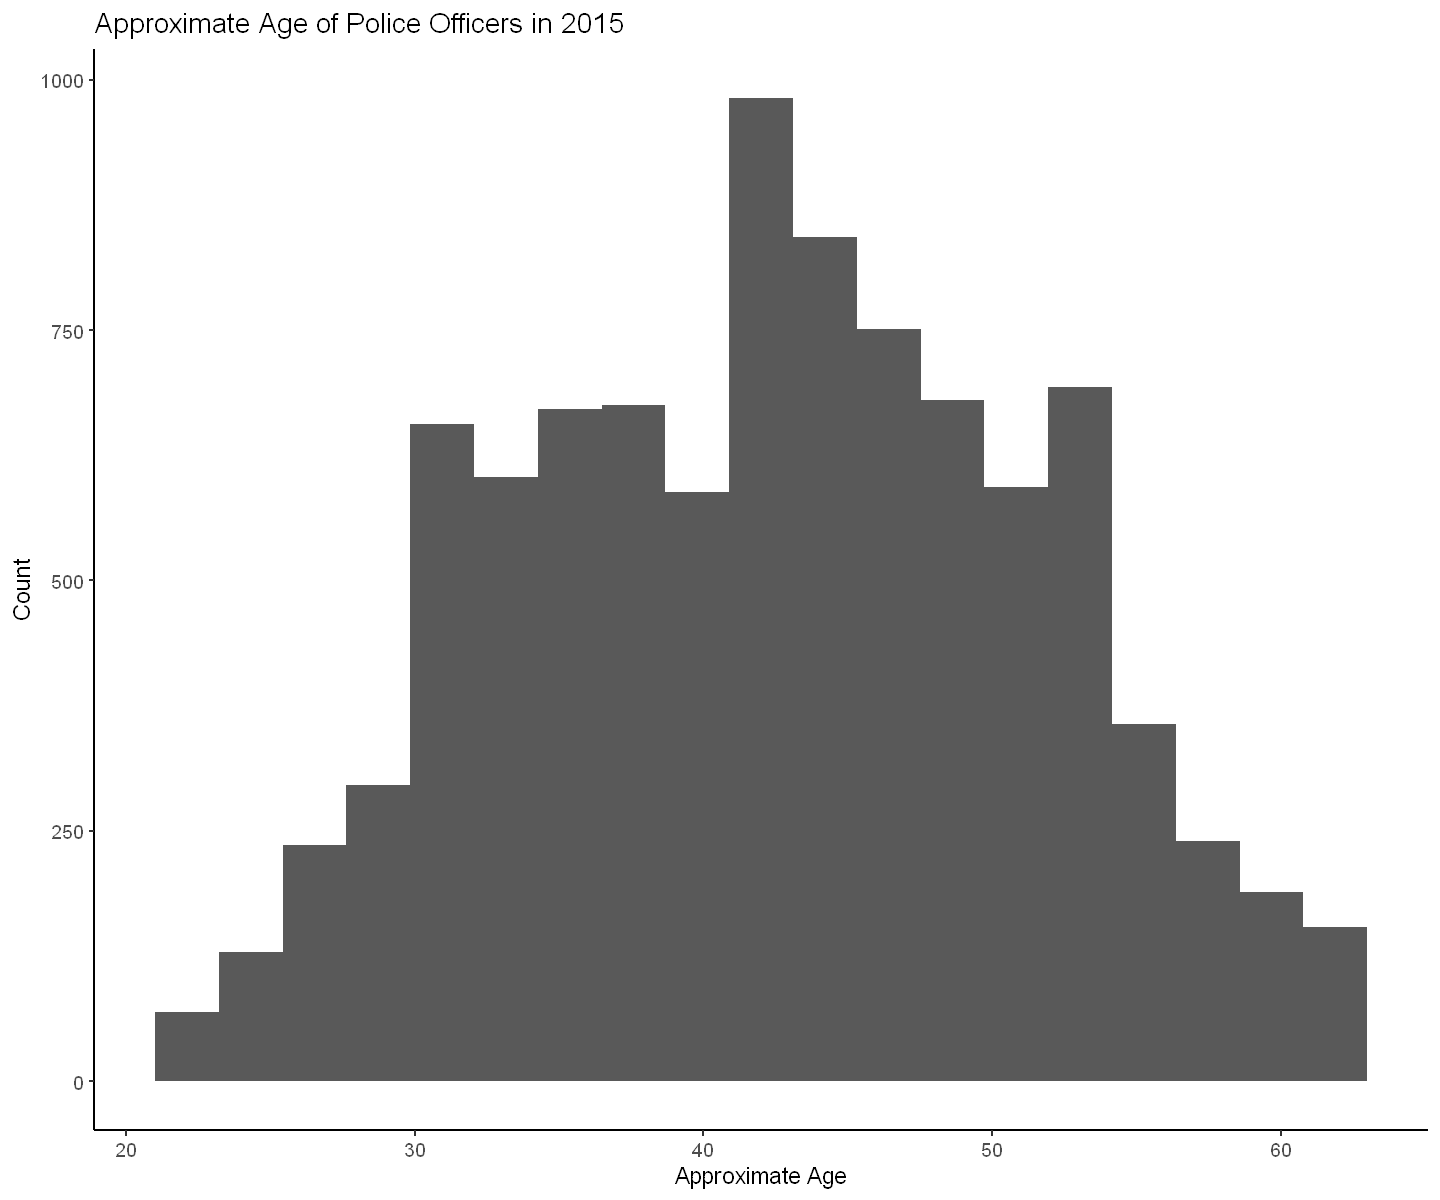

In [11]:
#Police Officer Age Dist (2015, chosen b/c a recent year that is pretty representative)
complaints_police %>% filter(year == 2015) %>% 
    ggplot(aes(x = approx_age)) + geom_histogram(bins = 20) +
    ggtitle("Approximate Age of Police Officers in 2015") +
    labs(x = "Approximate Age", y = "Count")

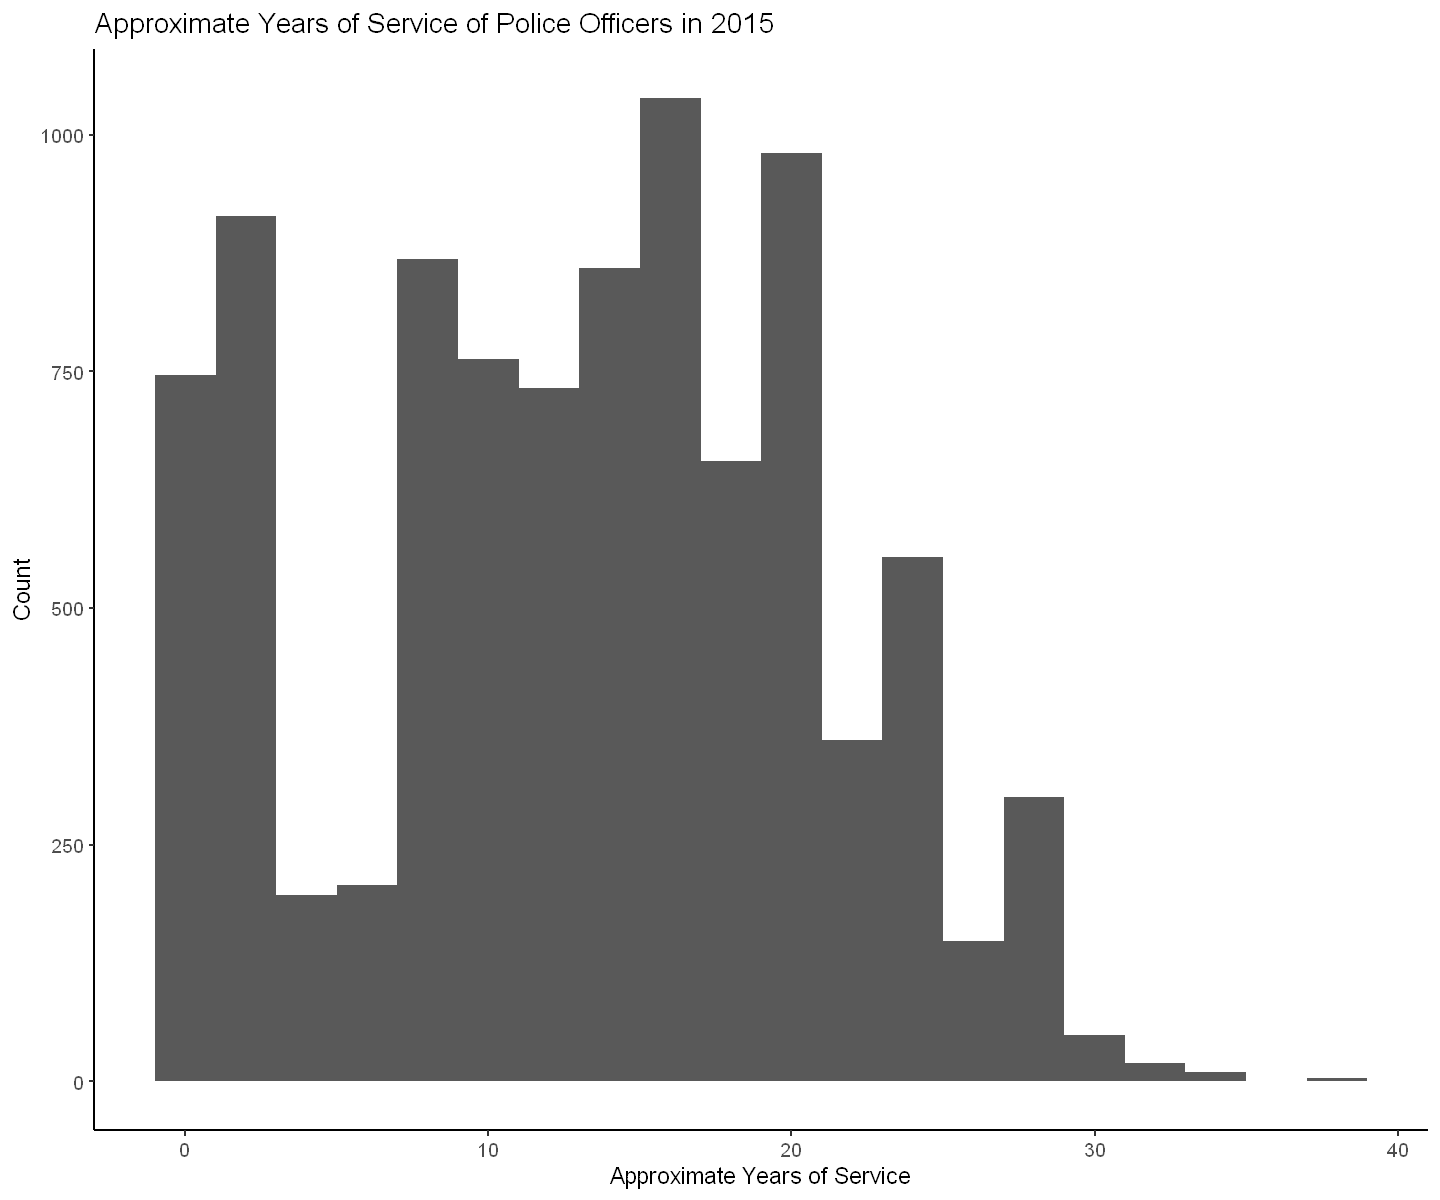

In [12]:
#Distribution of years of service in 2015
complaints_police %>% filter( year == 2015) %>% 
    ggplot(aes(x = approx_years_service)) + geom_histogram(bins = 20) +
    ggtitle("Approximate Years of Service of Police Officers in 2015") +
    labs(x = "Approximate Years of Service", y = "Count")

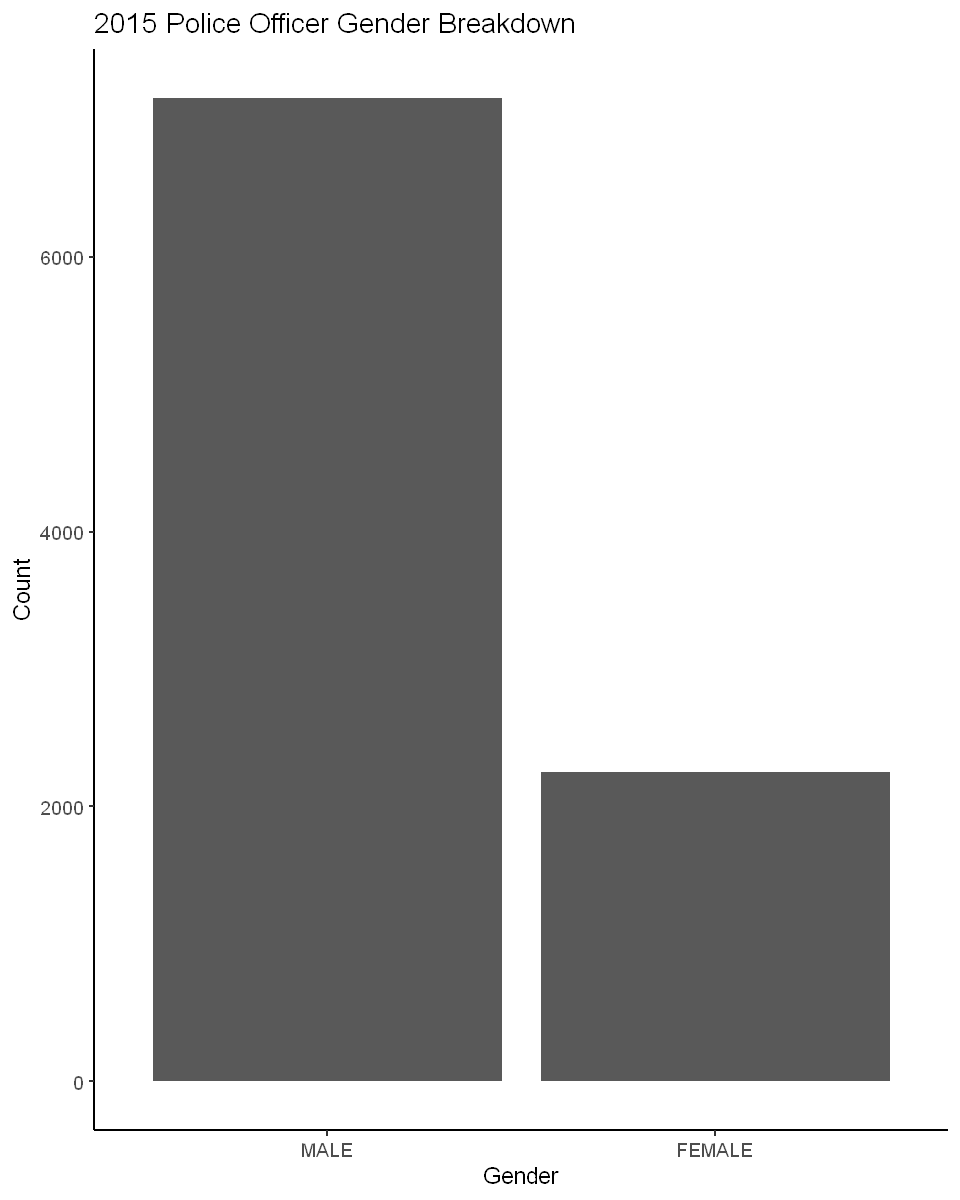

In [13]:
options(repr.plot.width=8, repr.plot.height=10)

# Gender Bar Chart 2015
complaints_police %>% filter(year == 2015) %>% group_by(year, gender) %>% 
    add_count(gender) %>% 
    ggplot(aes(x = reorder(gender, -n))) + 
    geom_bar() +
    ggtitle("2015 Police Officer Gender Breakdown") +
    labs(x = "Gender", y = "Count")


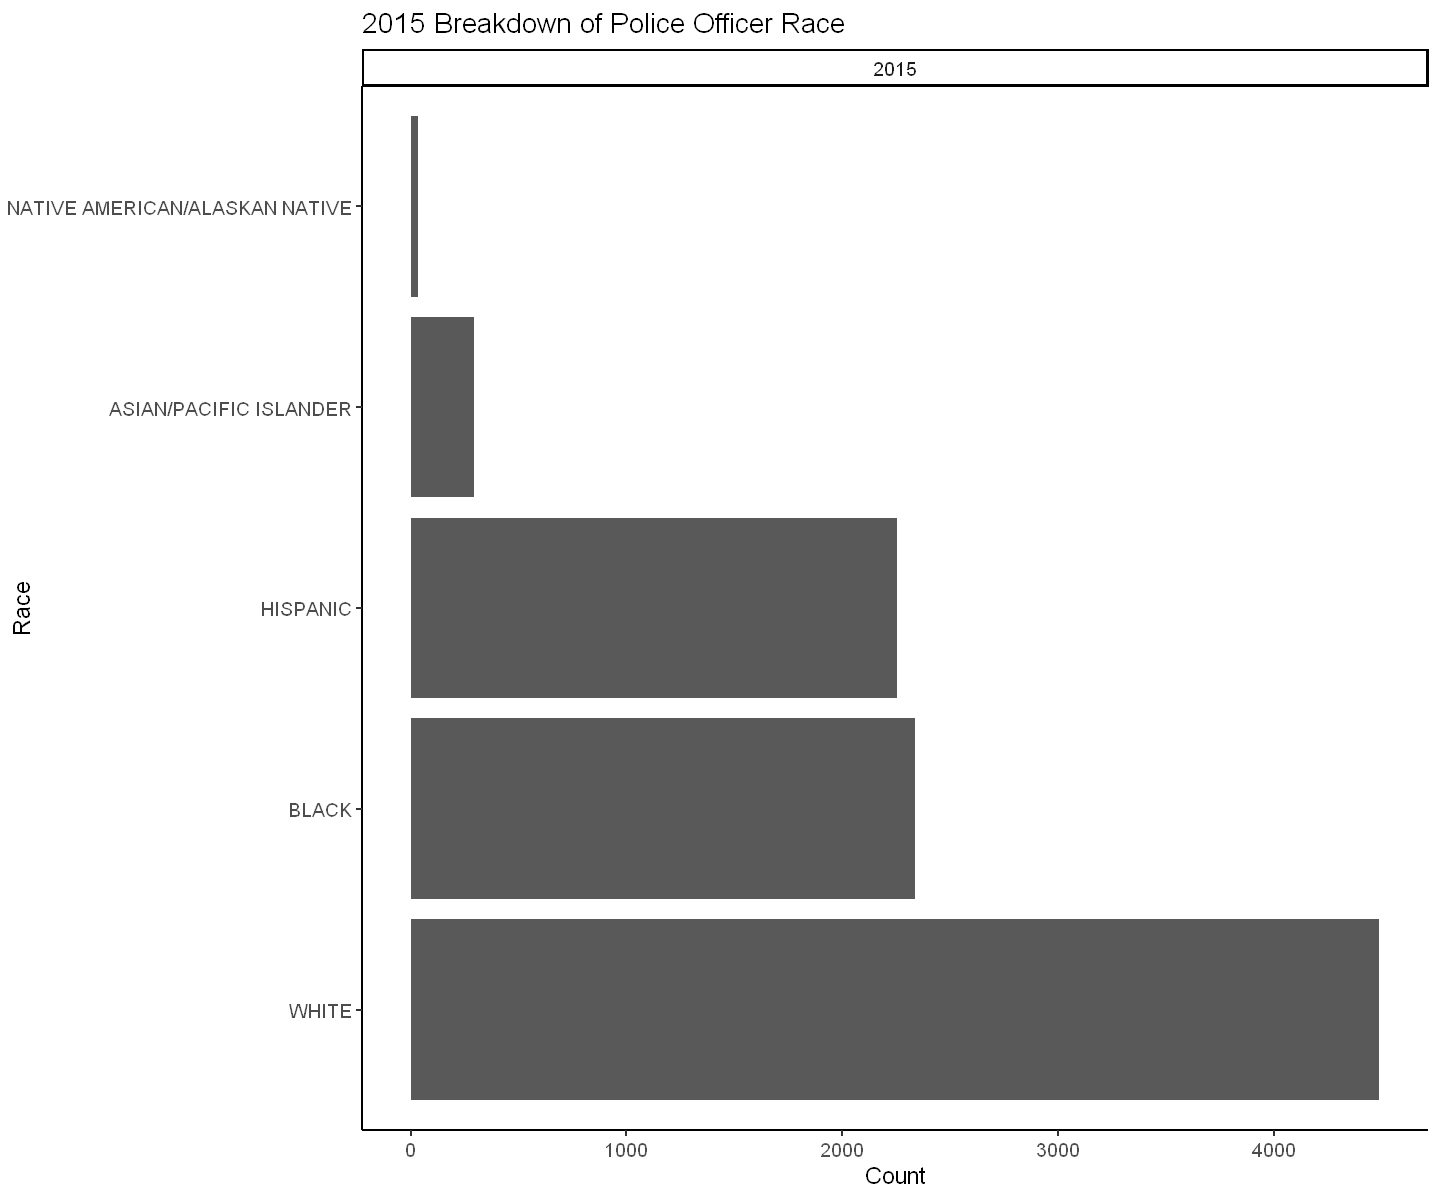

In [14]:
options(repr.plot.width=12, repr.plot.height=10)

# Race Bar Chart for 2015
complaints_police %>% filter(year == 2015) %>% group_by(year, race) %>% 
    add_count(race) %>% 
    ggplot(aes(y = reorder(race,-n))) + 
    geom_bar() + facet_wrap(~year) + 
    ggtitle("2015 Breakdown of Police Officer Race") +
    labs(x = "Count" , y = "Race")

## Explore correlation between complaints and salary + other demographic variables

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



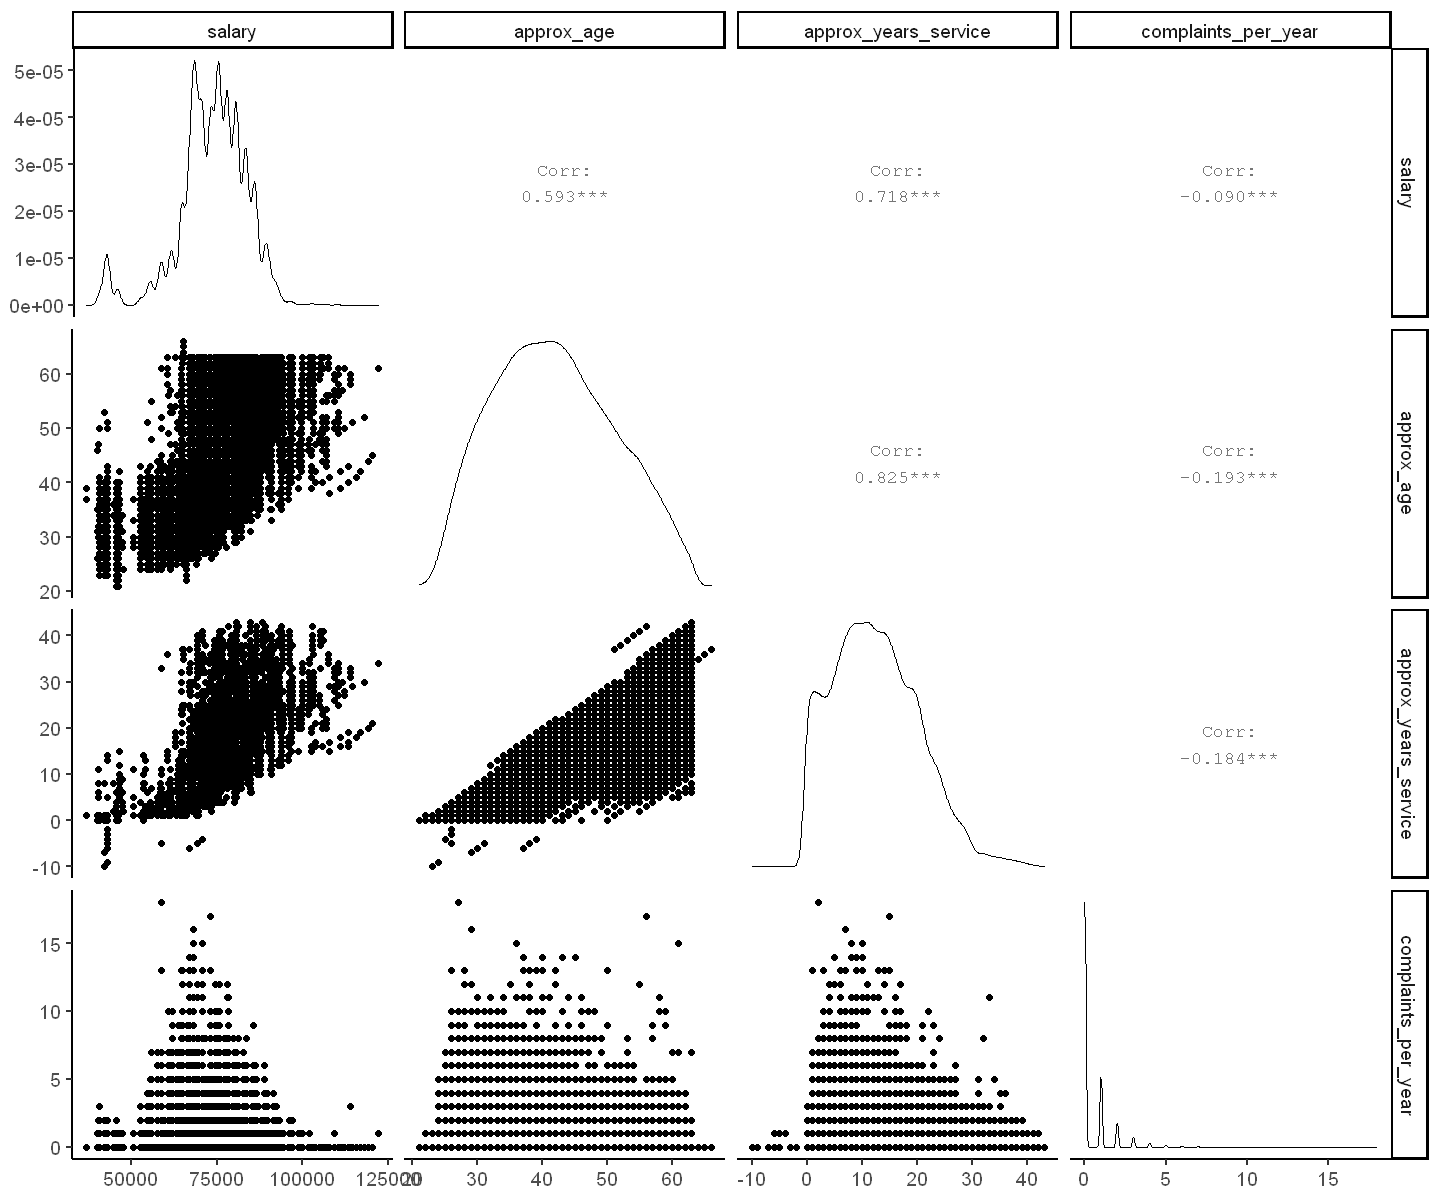

In [15]:
#Correlation Matrix ggpairs
corr_matrix <- complaints_police %>% 
    select(salary, approx_age, approx_years_service, complaints_per_year) %>% 
    GGally::ggpairs(progress=FALSE)

corr_matrix